In [1]:
import os
import pandas as pd
import seaborn as sns
import env
import wrangle
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

ModuleNotFoundError: No module named 'env'

### Mask for United Airlines

In [2]:
flights = wrangle.pull_airline_data('UA')

In [3]:
flights.OP_CARRIER.value_counts()

UA    5452568
Name: OP_CARRIER, dtype: int64

In [4]:
flights

,FL_DATE,OP_CARRIER,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
3102,2009-01-01,UA,NaN,NaN,NaN,NaN,NaN
3103,2009-01-01,UA,NaN,NaN,NaN,NaN,NaN
3104,2009-01-01,UA,NaN,NaN,NaN,NaN,NaN
3105,2009-01-01,UA,NaN,NaN,NaN,NaN,NaN
3106,2009-01-01,UA,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
7417301,2019-12-31,UA,NaN,NaN,NaN,NaN,NaN
7417302,2019-12-31,UA,NaN,NaN,NaN,NaN,NaN
7417303,2019-12-31,UA,NaN,NaN,NaN,NaN,NaN
7417304,2019-12-31,UA,NaN,NaN,NaN,NaN,NaN


In [5]:
flights.describe()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,1.030870e+06,1.030870e+06,1.030870e+06,1.030870e+06,1.030870e+06
mean,1.756348e+01,2.835766e+00,1.859367e+01,2.661926e-02,2.569592e+01
std,4.628558e+01,2.259016e+01,3.569333e+01,1.764515e+00,5.199768e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00
75%,1.800000e+01,0.000000e+00,2.300000e+01,0.000000e+00,3.100000e+01
max,1.523000e+03,1.398000e+03,1.375000e+03,7.170000e+02,1.509000e+03


### How are these columns related and how can I combine them

### Compare the columns by various measures

In [6]:
#Fills in nulls as zero as null means no delay
flights.fillna(0, inplace=True)
#Makes FL_DATE column a datetime datatype
flights.FL_DATE = flights.FL_DATE.astype('datetime64')
#Makes FL_DATE the index
# flights = flights.set_index('FL_DATE')

In [7]:
flights_cat = flights
flights_cat['carrier'] = flights_cat.CARRIER_DELAY > 0

In [8]:
flights_cat['weather'] = flights_cat.WEATHER_DELAY > 0

In [9]:
flights_cat['nas'] = flights_cat.NAS_DELAY > 0

In [10]:
flights_cat['security'] = flights_cat.SECURITY_DELAY > 0

In [11]:
flights_cat['late_aircraft'] = flights_cat.LATE_AIRCRAFT_DELAY > 0

In [12]:
flights_cat.drop(columns=['OP_CARRIER', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'])

,FL_DATE,carrier,weather,nas,security,late_aircraft
3102,2009-01-01,False,False,False,False,False
3103,2009-01-01,False,False,False,False,False
3104,2009-01-01,False,False,False,False,False
3105,2009-01-01,False,False,False,False,False
3106,2009-01-01,False,False,False,False,False
...,...,...,...,...,...,...
7417301,2019-12-31,False,False,False,False,False
7417302,2019-12-31,False,False,False,False,False
7417303,2019-12-31,False,False,False,False,False
7417304,2019-12-31,False,False,False,False,False


### At first glance it seems weird that weather does not have as many rows as the rest.  As a pilot I thought that weather dominates the delays so I wondered why this is the case.

### It seems that the NAS data includes non extreme weater as does carrier and late aircraft delay.

In [13]:
dep = pd.crosstab(flights_cat.FL_DATE, [flights_cat.carrier, flights_cat.weather, flights_cat.nas, flights_cat.security, flights_cat.late_aircraft])

### Chi squared
* Null Hypothesis:  These delay types are independent of each other
* Alternative Hypothesis:  These types are dependent on each other
* Alpha < 0.05

In [14]:
dep

carrier       False                                                        \
weather       False                                           True          
nas           False                   True                    False         
security      False       True        False       True        False         
late_aircraft False True  False True  False True  False True  False True    
FL_DATE                                                                     
2009-01-01      823    39     0     0    27    11     0     0     2     2   
2009-01-02      880    54     0     0    50    23     0     0     0     2   
2009-01-03      827    32     0     0    57    29     0     0     2     0   
2009-01-04      918    30     0     0    39    13     0     0     3     2   
2009-01-05      893    33     0     0    59    24     0     0     3     1   
...             ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2019-12-27     1493    17     0     0    40    16     0     0     1     1   
2019-12-28     1093    40     0     0   124    56     0     0     1    12   
2019-12-29     1255    41     0     0    85    26     0     0     7    25   
2019-12-30     1321    20     0     0   112    40     0     0     7    17   
2019-12-31     1309    19     0     0    50    13     0     0     0     6   

carrier                   True                     
weather                   False                    
nas           True        False       True         
security      False       False       False        
late_aircraft False True  False True  False True   
FL_DATE                                            
2009-01-01        2     1    38    25    18     8  
2009-01-02        2     0    41    29    17     2  
2009-01-03        1     5    23    32    37    17  
2009-01-04        4     0    25    27    28     6  
2009-01-05        2     1    28    35    13    10  
...             ...   ...   ...   ...   ...   ...  
2019-12-27        2     1    51    64    30    14  
2019-12-28       13    28    39    86    55    51  
2019-12-29       14    13    54    79    54    28  
2019-12-30       13     4    44    85    40    25  
2019-12-31        2     2    39    30    15     4  

[3955 rows x 16 columns]

In [15]:
chi2, p, degf, expected = stats.chi2_contingency(dep)

In [16]:
chi2, p

(655316.9995479744, 0.0)

#### There is sufficient evidence to reject the null.  They are dependent on each other.

#### This suggests that there may bee some sort of overlap.  A quick look at the NAS delays shows that minor weather phenomena show up in the NAS as opposed to weather.  Also a weather delay on one leg of an airplanes trip seems to turn into a carrier delay on the next.

### A look at histograms

(array([5.163771e+06, 1.330480e+05, 5.171100e+04, 2.872300e+04,
        1.984700e+04, 1.280000e+04, 9.147000e+03, 6.794000e+03,
        5.558000e+03, 3.839000e+03, 3.075000e+03, 2.374000e+03,
        1.847000e+03, 1.644000e+03, 1.195000e+03, 9.840000e+02,
        7.880000e+02, 6.790000e+02, 5.420000e+02, 4.770000e+02,
        3.880000e+02, 3.070000e+02, 2.590000e+02, 2.450000e+02,
        1.930000e+02, 1.880000e+02, 1.700000e+02, 1.520000e+02,
        1.330000e+02, 1.110000e+02, 8.900000e+01, 1.010000e+02,
        9.000000e+01, 7.500000e+01, 6.600000e+01, 6.200000e+01,
        5.400000e+01, 5.100000e+01, 5.400000e+01, 4.300000e+01,
        5.100000e+01, 3.700000e+01, 3.900000e+01, 3.800000e+01,
        3.000000e+01, 3.300000e+01, 4.000000e+01, 2.900000e+01,
        2.800000e+01, 2.800000e+01, 2.500000e+01, 2.800000e+01,
        3.800000e+01, 2.600000e+01, 2.700000e+01, 2.300000e+01,
        2.300000e+01, 2.000000e+01, 1.300000e+01, 1.900000e+01,
        2.000000e+01, 2.100000e+01, 1.40

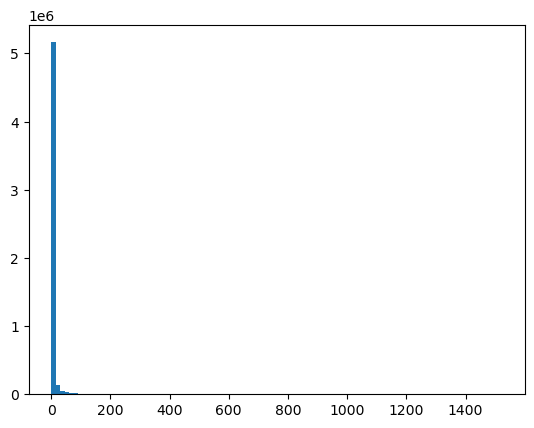

In [17]:
plt.hist(flights.CARRIER_DELAY, bins=100)

(array([5.409598e+06, 1.573700e+04, 8.128000e+03, 4.927000e+03,
        3.230000e+03, 2.242000e+03, 1.665000e+03, 1.229000e+03,
        9.470000e+02, 7.500000e+02, 6.430000e+02, 4.700000e+02,
        3.830000e+02, 3.370000e+02, 2.710000e+02, 2.280000e+02,
        1.850000e+02, 1.550000e+02, 1.520000e+02, 1.230000e+02,
        1.170000e+02, 1.070000e+02, 9.200000e+01, 7.900000e+01,
        7.400000e+01, 5.000000e+01, 4.800000e+01, 4.000000e+01,
        3.100000e+01, 3.100000e+01, 2.700000e+01, 1.400000e+01,
        2.700000e+01, 2.200000e+01, 1.600000e+01, 1.400000e+01,
        1.800000e+01, 2.100000e+01, 1.700000e+01, 1.300000e+01,
        1.200000e+01, 1.300000e+01, 1.000000e+01, 1.400000e+01,
        1.500000e+01, 8.000000e+00, 1.500000e+01, 1.400000e+01,
        1.800000e+01, 9.000000e+00, 2.200000e+01, 1.000000e+01,
        4.000000e+00, 3.000000e+00, 7.000000e+00, 1.000000e+01,
        8.000000e+00, 6.000000e+00, 6.000000e+00, 5.000000e+00,
        6.000000e+00, 9.000000e+00, 4.00

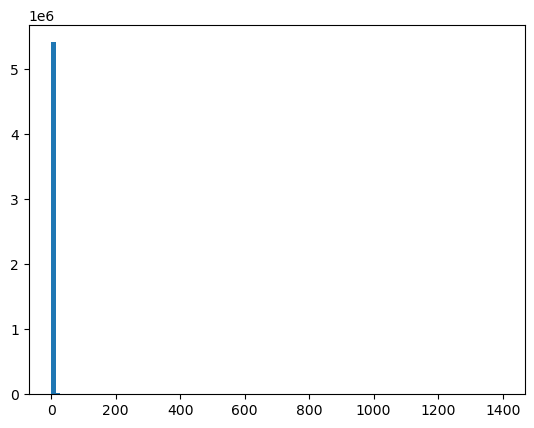

In [18]:
plt.hist(flights.WEATHER_DELAY, bins=100)

(array([5.043421e+06, 2.008280e+05, 8.064000e+04, 3.858100e+04,
        2.478100e+04, 1.590400e+04, 1.101700e+04, 7.725000e+03,
        6.403000e+03, 4.901000e+03, 3.906000e+03, 2.832000e+03,
        2.394000e+03, 1.874000e+03, 1.425000e+03, 1.098000e+03,
        9.010000e+02, 7.210000e+02, 6.120000e+02, 4.490000e+02,
        3.790000e+02, 3.120000e+02, 2.560000e+02, 1.960000e+02,
        1.670000e+02, 1.130000e+02, 1.190000e+02, 9.800000e+01,
        7.100000e+01, 5.800000e+01, 5.900000e+01, 3.800000e+01,
        4.300000e+01, 3.100000e+01, 1.500000e+01, 2.300000e+01,
        1.300000e+01, 1.300000e+01, 4.000000e+00, 6.000000e+00,
        1.100000e+01, 1.000000e+01, 6.000000e+00, 8.000000e+00,
        5.000000e+00, 3.000000e+00, 5.000000e+00, 2.000000e+00,
        6.000000e+00, 3.000000e+00, 5.000000e+00, 5.000000e+00,
        3.000000e+00, 3.000000e+00, 1.000000e+00, 1.000000e+00,
        3.000000e+00, 3.000000e+00, 4.000000e+00, 1.000000e+00,
        2.000000e+00, 2.000000e+00, 6.00

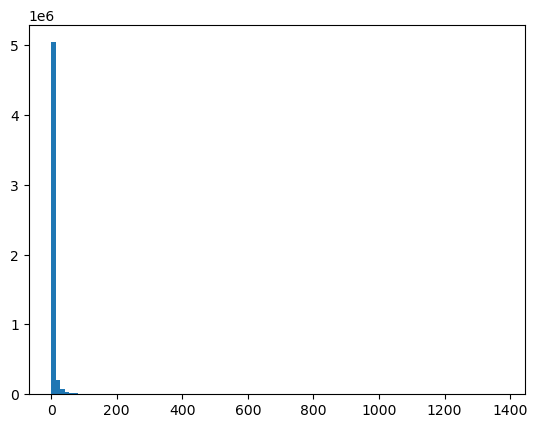

In [19]:
plt.hist(flights.NAS_DELAY, bins=100)

(array([5.451935e+06, 1.460000e+02, 1.590000e+02, 9.000000e+01,
        4.500000e+01, 3.300000e+01, 1.800000e+01, 2.500000e+01,
        1.300000e+01, 9.000000e+00, 6.000000e+00, 1.200000e+01,
        6.000000e+00, 2.000000e+00, 7.000000e+00, 5.000000e+00,
        7.000000e+00, 5.000000e+00, 3.000000e+00, 3.000000e+00,
        6.000000e+00, 4.000000e+00, 4.000000e+00, 4.000000e+00,
        3.000000e+00, 2.000000e+00, 1.000000e+00, 0.000000e+00,
        2.000000e+00, 1.000000e+00, 2.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 2.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        2.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.00

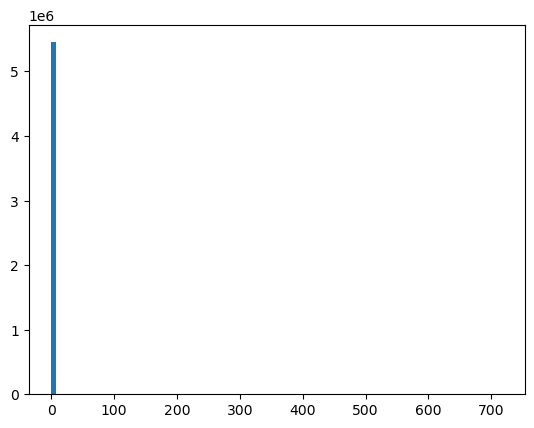

In [20]:
plt.hist(flights.SECURITY_DELAY, bins=100)

(array([5.086366e+06, 1.055510e+05, 6.710300e+04, 4.732500e+04,
        3.410600e+04, 2.498500e+04, 1.892500e+04, 1.451800e+04,
        1.106600e+04, 8.639000e+03, 6.923000e+03, 5.679000e+03,
        4.121000e+03, 3.330000e+03, 2.628000e+03, 2.074000e+03,
        1.609000e+03, 1.279000e+03, 1.039000e+03, 8.560000e+02,
        7.070000e+02, 5.930000e+02, 4.560000e+02, 3.420000e+02,
        2.950000e+02, 2.870000e+02, 1.980000e+02, 1.650000e+02,
        1.430000e+02, 1.270000e+02, 1.100000e+02, 1.070000e+02,
        8.400000e+01, 7.900000e+01, 6.400000e+01, 4.500000e+01,
        5.500000e+01, 4.600000e+01, 3.700000e+01, 4.200000e+01,
        2.000000e+01, 2.900000e+01, 3.500000e+01, 2.200000e+01,
        2.100000e+01, 2.700000e+01, 1.600000e+01, 2.000000e+01,
        1.200000e+01, 2.000000e+01, 1.700000e+01, 1.300000e+01,
        1.600000e+01, 8.000000e+00, 1.900000e+01, 1.000000e+01,
        1.600000e+01, 1.100000e+01, 1.000000e+01, 5.000000e+00,
        1.300000e+01, 6.000000e+00, 8.00

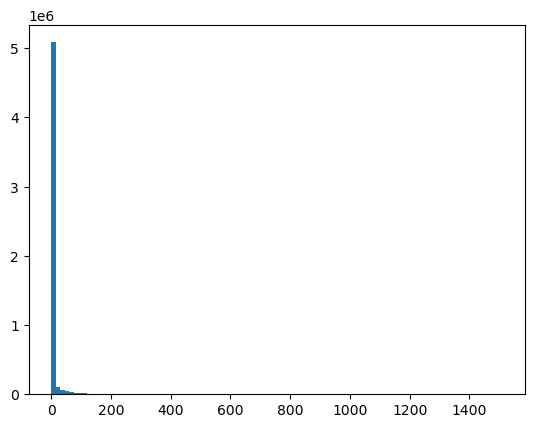

In [21]:
plt.hist(flights.LATE_AIRCRAFT_DELAY, bins=100)

#### Skewed makes a whole lot of sense.  Nothing unexpected here.

### THERE IS sufficient evidence that I can combine these columns in feature engineering.

### Resample my data by daily mean delays

In [22]:
flights_daily_mean = wrangle.clean_flight_data_for_average_daily_delay(flights)

/Users/alfredpirovits/codeup-data-science/individual-project/wrangle.py:57: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  flights.FL_DATE = flights.FL_DATE.astype('datetime64')
/Users/alfredpirovits/codeup-data-science/individual-project/wrangle.py:87: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  list_tuples.FL_DATE = list_tuples.FL_DATE.astype('datetime64')
/Users/alfredpirovits/codeup-data-science/individual-project/wrangle.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flights_daily_mean = flights_daily_mean.append(list_tuples)
/Users/alfredpirovits/codeup-data-science/individual-project/wrangle.py:102: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a f

In [23]:
flights_daily_mean.sort_index()

,average_delay
FL_DATE,
2009-01-01,9.676707
2009-01-02,14.156364
2009-01-03,11.209040
2009-01-04,7.436530
2009-01-05,8.880218
...,...
2019-12-27,7.031214
2019-12-28,22.058198
2019-12-29,19.964902


In [24]:
flights_daily_mean.isna().sum()

average_delay    0
dtype: int64

### Find the best interval to define average delay by to optimize reducing noise while keeping good correlation results

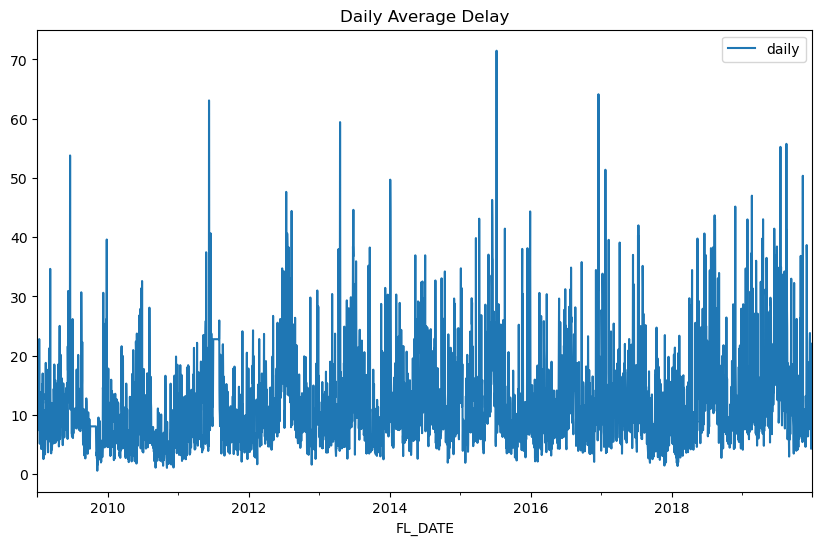

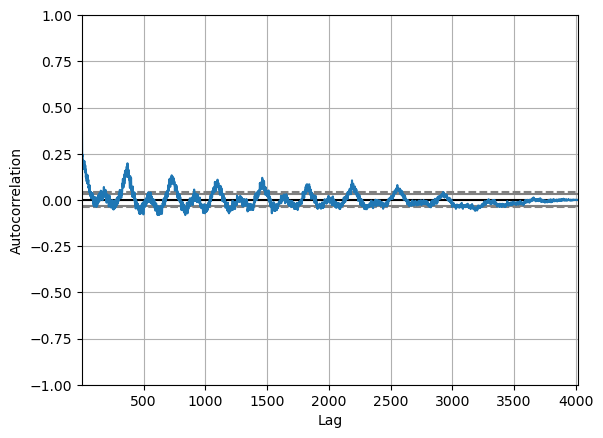

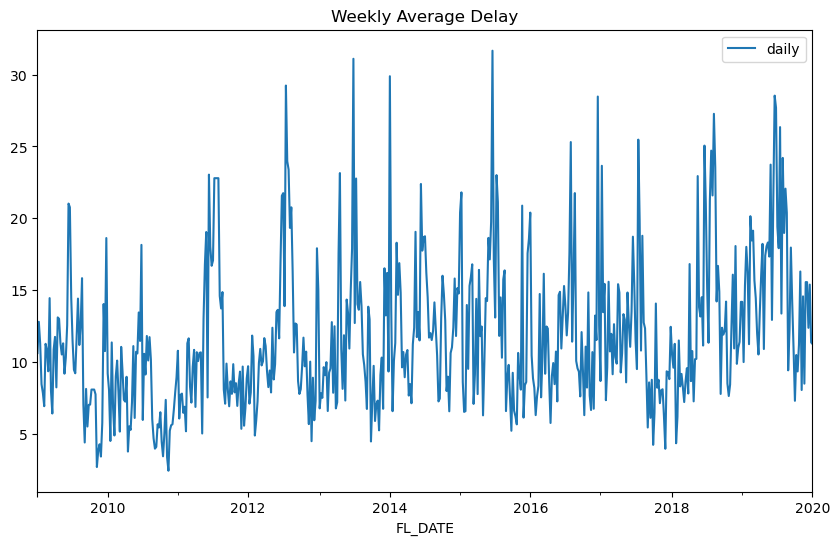

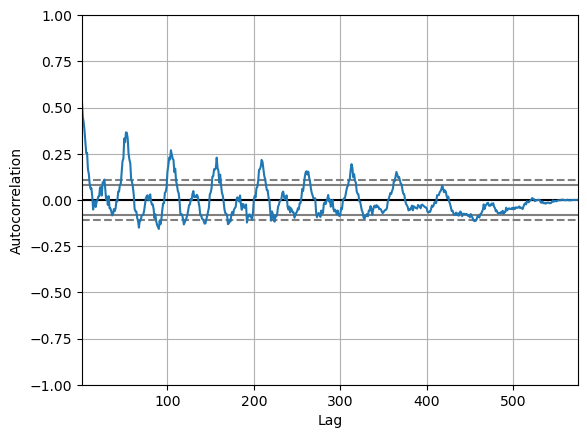

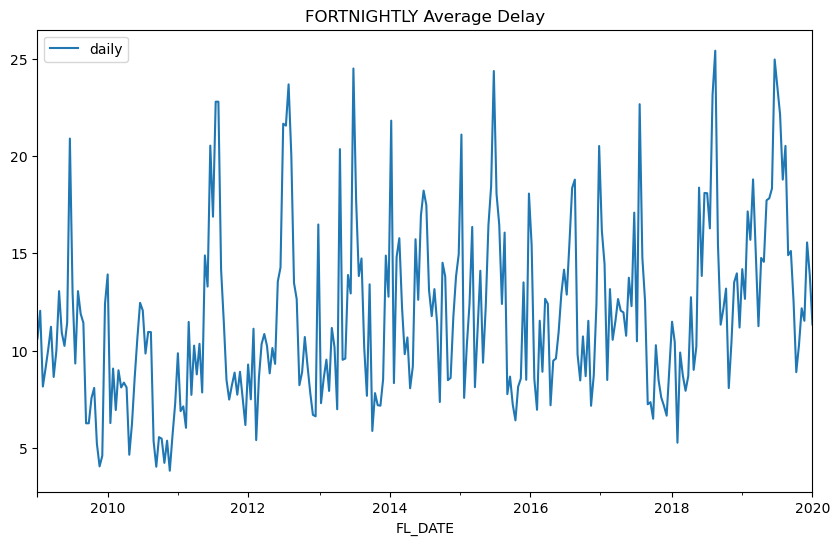

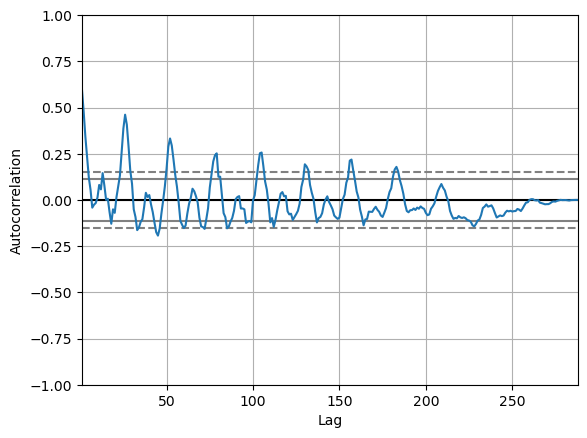

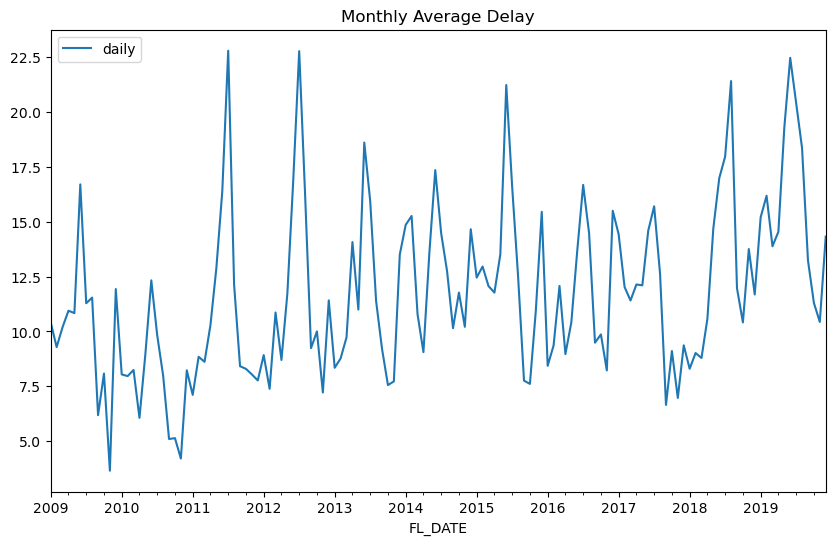

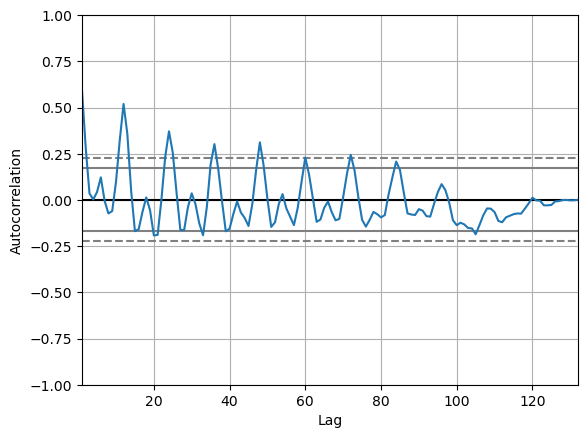

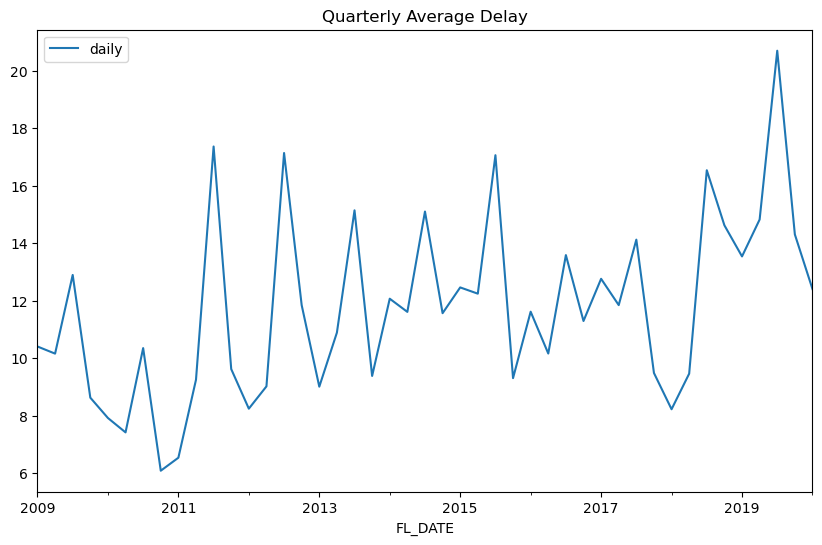

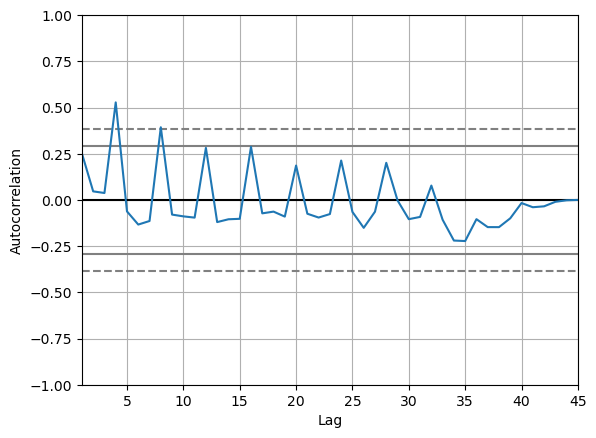

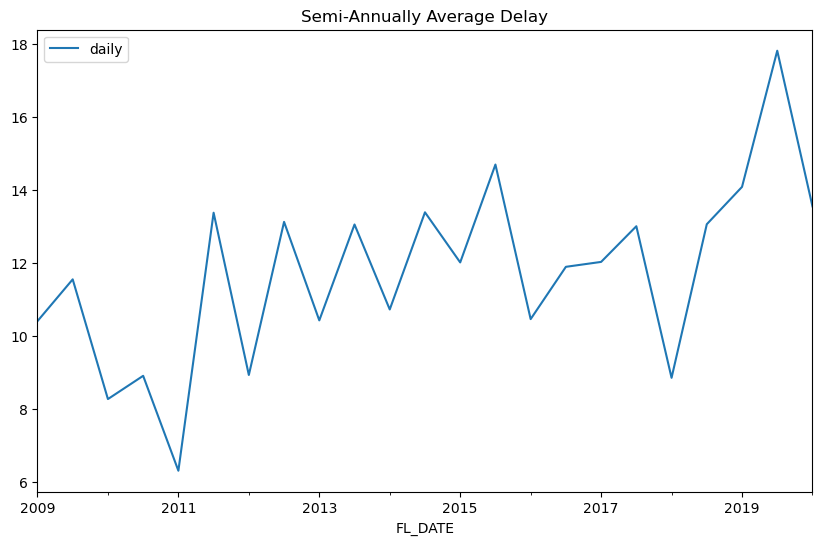

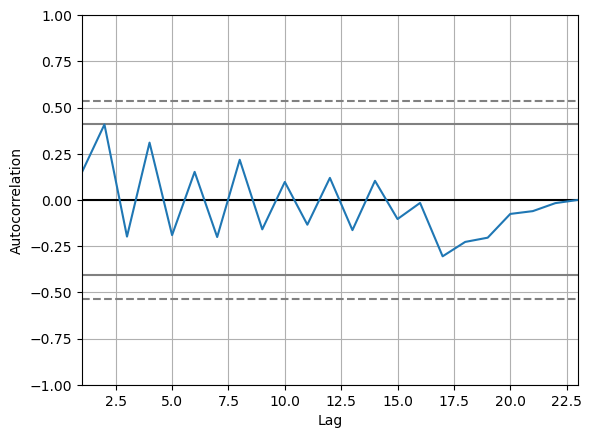

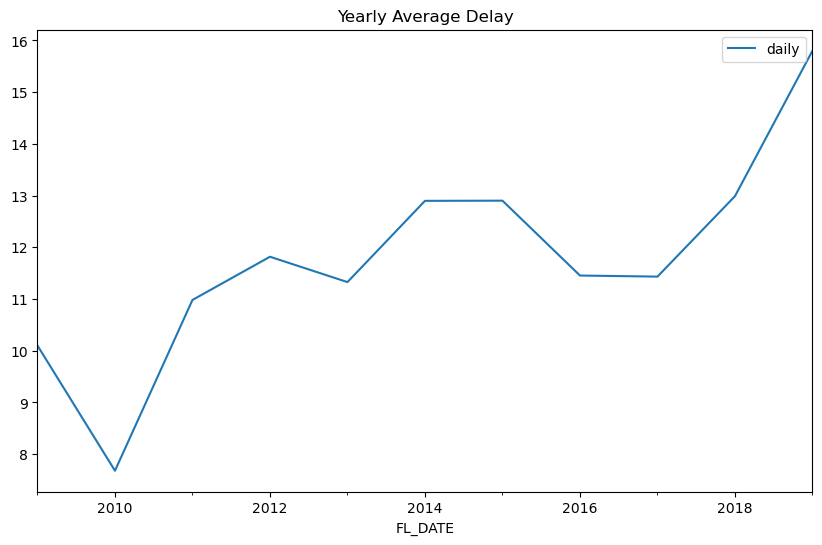

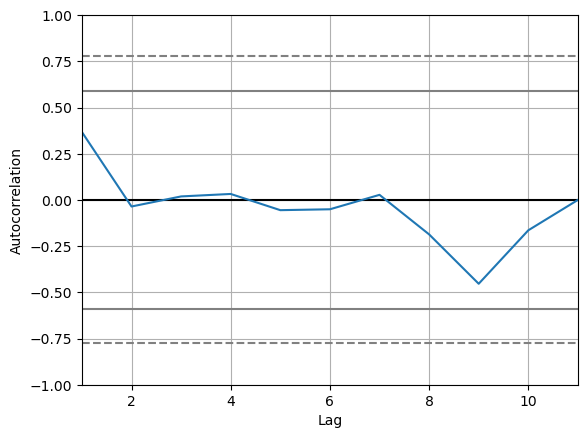

In [25]:
def plot_average_by_interval():
    
    resample_dict = {'D':'Daily', 'W':'Weekly', '2W':'FORTNIGHTLY', 'M':'Monthly', '3M':'Quarterly', '6M':'Semi-Annually', 'Y':'Yearly'}

    for _ in resample_dict:
        plt.figure(figsize=(10,6))

        flights_daily_mean.resample(_).mean().average_delay.plot(label='daily')
        # flights_daily_mean.resample('W').mean().average_delay.plot(label='weekly')
        # flights_daily_mean.resample('M').mean().average_delay.plot(label='monthly')
        # flights_daily_mean.resample('Y').mean().average_delay.plot(label='yearly')


        plt.title(f'{resample_dict[_][0:]} Average Delay')
        plt.legend()
        plt.show()

        pd.plotting.autocorrelation_plot(flights_daily_mean.average_delay.resample(_).mean())
        plt.show()

plot_average_by_interval()

### Plot the best lag plot based on the airline.  The best will always be 365

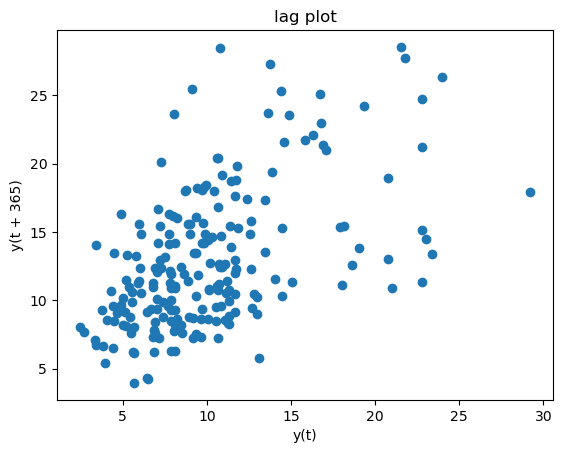

In [26]:
def plot_best_lag_plot():

    #Plots the best correlated lag
    pd.plotting.lag_plot(flights_daily_mean.resample('W').mean(), lag=365)
    plt.title('lag plot');

plot_best_lag_plot()

### Split the data by year

In [27]:
train = flights_daily_mean.iloc[:2016] 
test = flights_daily_mean.iloc[2016:] 
train.loc['2009-09-30':]

,average_delay
FL_DATE,
2009-09-30,5.646543
2009-10-01,8.079063
2009-10-02,8.079063
2009-10-03,8.079063
2009-10-04,8.079063
...,...
2014-07-05,7.241739
2014-07-06,11.011687
2014-07-07,13.286847


In [28]:
test

,average_delay
FL_DATE,
2014-07-10,11.956667
2014-07-11,11.269282
2014-07-12,20.357084
2014-07-13,14.929145
2014-07-14,24.762442
...,...
2019-12-27,7.031214
2019-12-28,22.058198
2019-12-29,19.964902


### Plot the seasonal decompositions for the various time periods

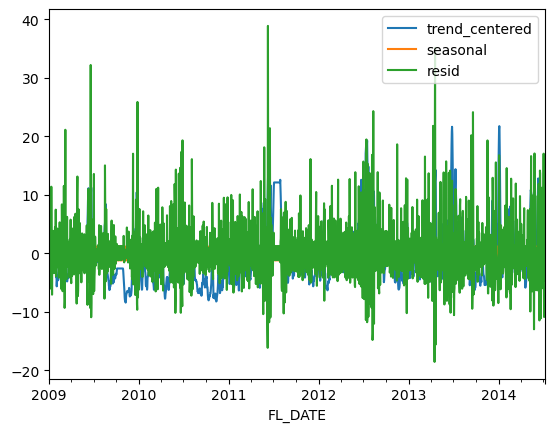

In [29]:
y = train.average_delay.resample('d').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

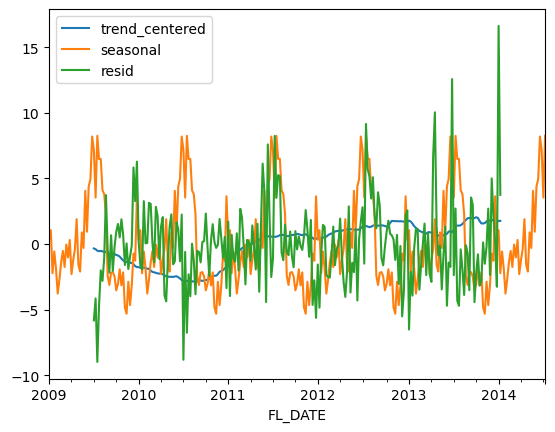

In [30]:
y = train.average_delay.resample('w').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

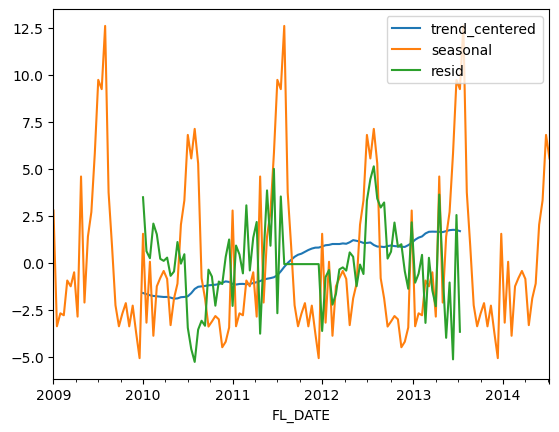

In [31]:
def seasonal_decomposition_plot(duration):
    y = train.average_delay.resample(duration).mean()

    result = sm.tsa.seasonal_decompose(y)

    decomposition = pd.DataFrame({
        'y': result.observed,
        'trend': result.trend,
        'seasonal': result.seasonal,
        'resid': result.resid
    })

    decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
    decomposition[['trend_centered', 'seasonal', 'resid']].plot();
    
seasonal_decomposition_plot('2w')

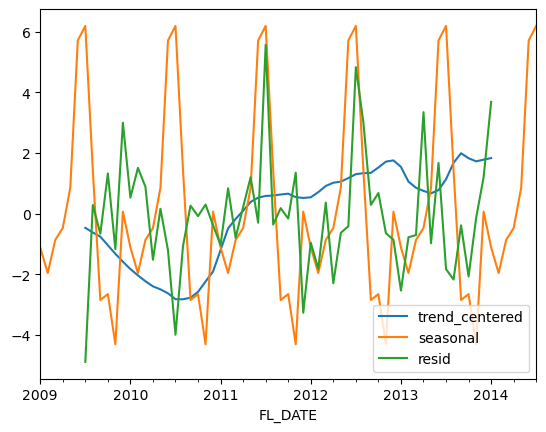

In [32]:
y = train.average_delay.resample('m').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

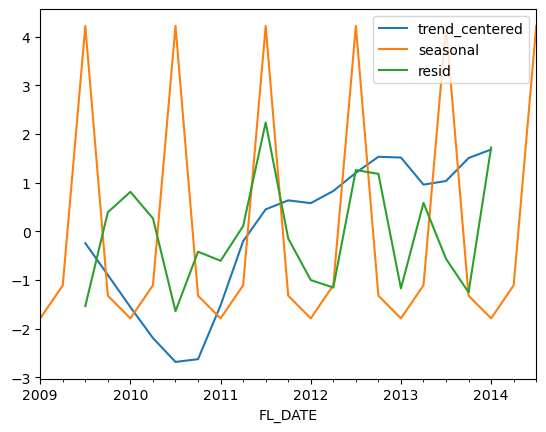

In [33]:
y = train.average_delay.resample('3m').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

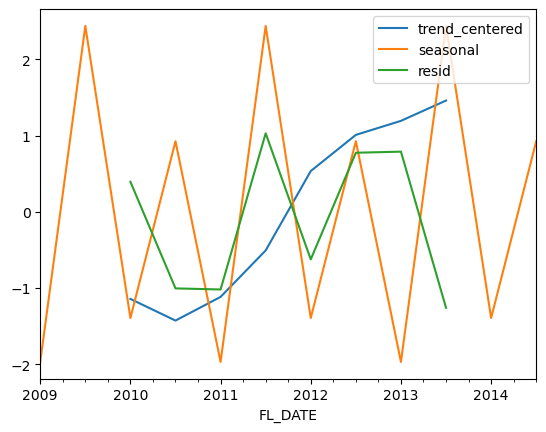

In [34]:
y = train.average_delay.resample('6m').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

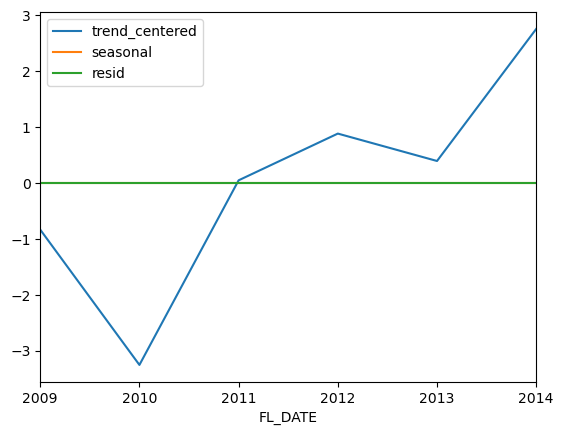

In [35]:
y = train.average_delay.resample('y').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

### Once again the best period to resample by seems to be 2 weeks or a fortnight